Saving TikaiAtbildes.csv to TikaiAtbildes.csv


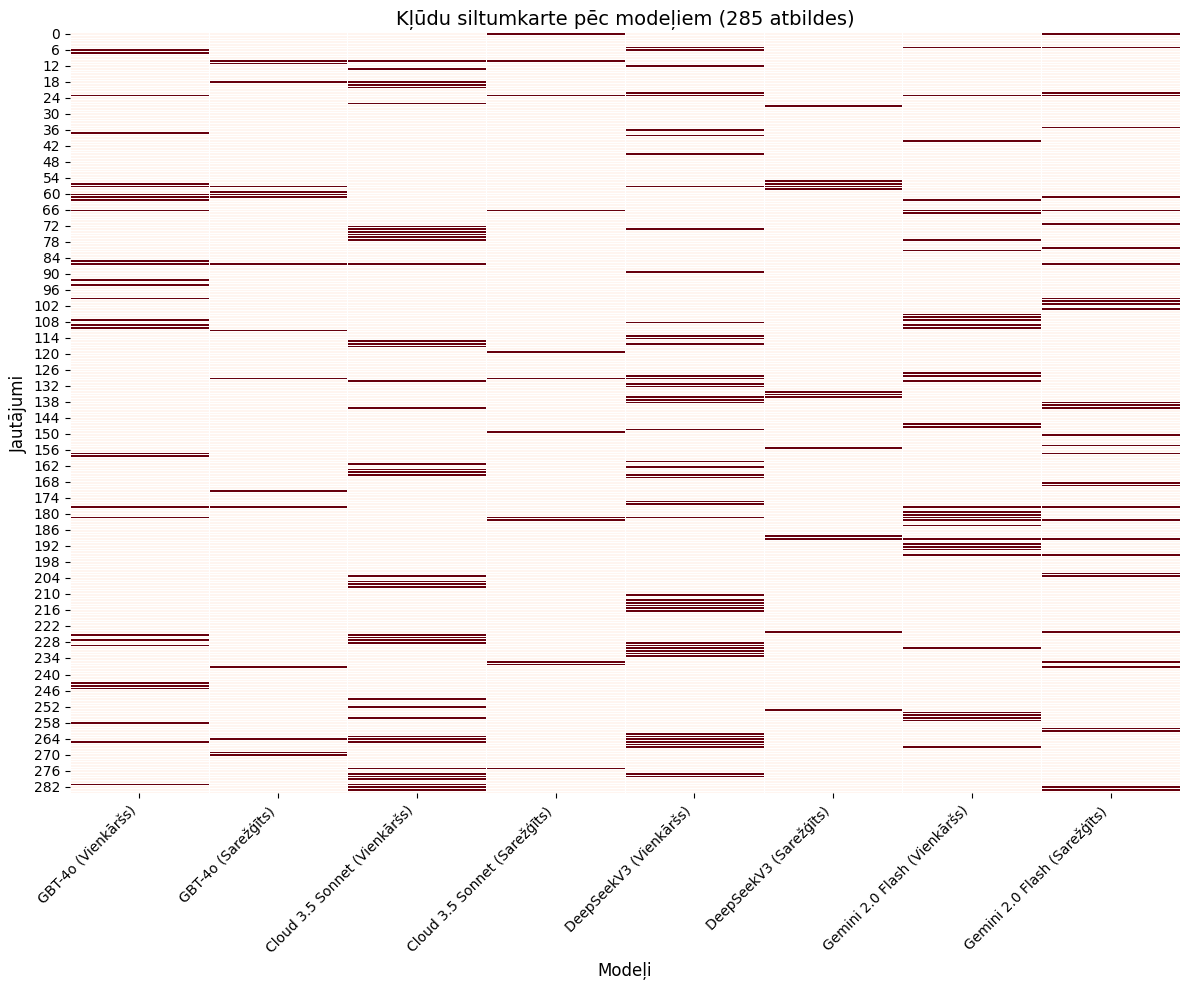

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Augšupielādē TikaiAtbildes.csv failu no datora
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))
df_split = df.iloc[:, 0].str.split(";", expand=True)
df_split.columns = [
    "GBT-4o (Vienkāršs)",
    "GBT-4o (Sarežģīts)",
    "Cloud 3.5 Sonnet (Vienkāršs)",
    "Cloud 3.5 Sonnet (Sarežģīts)",
    "DeepSeekV3 (Vienkāršs)",
    "DeepSeekV3 (Sarežģīts)",
    "Gemini 2.0 Flash (Vienkāršs)",
    "Gemini 2.0 Flash (Sarežģīts)"
]
df_bool = df_split == "TRUE"


plt.figure(figsize=(12, 10))
sns.heatmap(~df_bool, cmap="Reds", cbar=False, linewidths=0.5)
plt.title("Kļūdu siltumkarte pēc modeļiem (285 atbildes)", fontsize=14)
plt.xlabel("Modeļi", fontsize=12)
plt.ylabel("Jautājumi", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


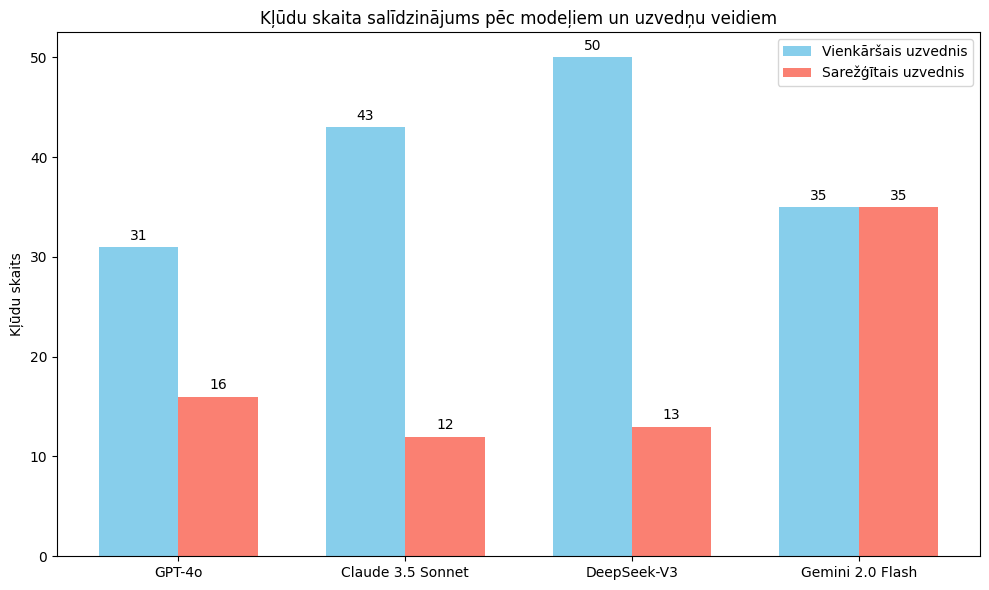

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


models = ['GPT-4o', 'Claude 3.5 Sonnet', 'DeepSeek-V3', 'Gemini 2.0 Flash']


errors_simple = [31, 43, 50, 35]
errors_complex = [16, 12, 13, 35]

x = np.arange(len(models))

width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, errors_simple, width, label='Vienkāršais uzvednis', color='skyblue')
bars2 = ax.bar(x + width/2, errors_complex, width, label='Sarežģītais uzvednis', color='salmon')


ax.set_ylabel('Kļūdu skaits')
ax.set_title('Kļūdu skaita salīdzinājums pēc modeļiem un uzvedņu veidiem')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()
plt.show()

Saving Tēmas-un-atbildes.csv to Tēmas-un-atbildes.csv


<ipython-input-3-2216a7bd94e0>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_models = df_models_raw.applymap(


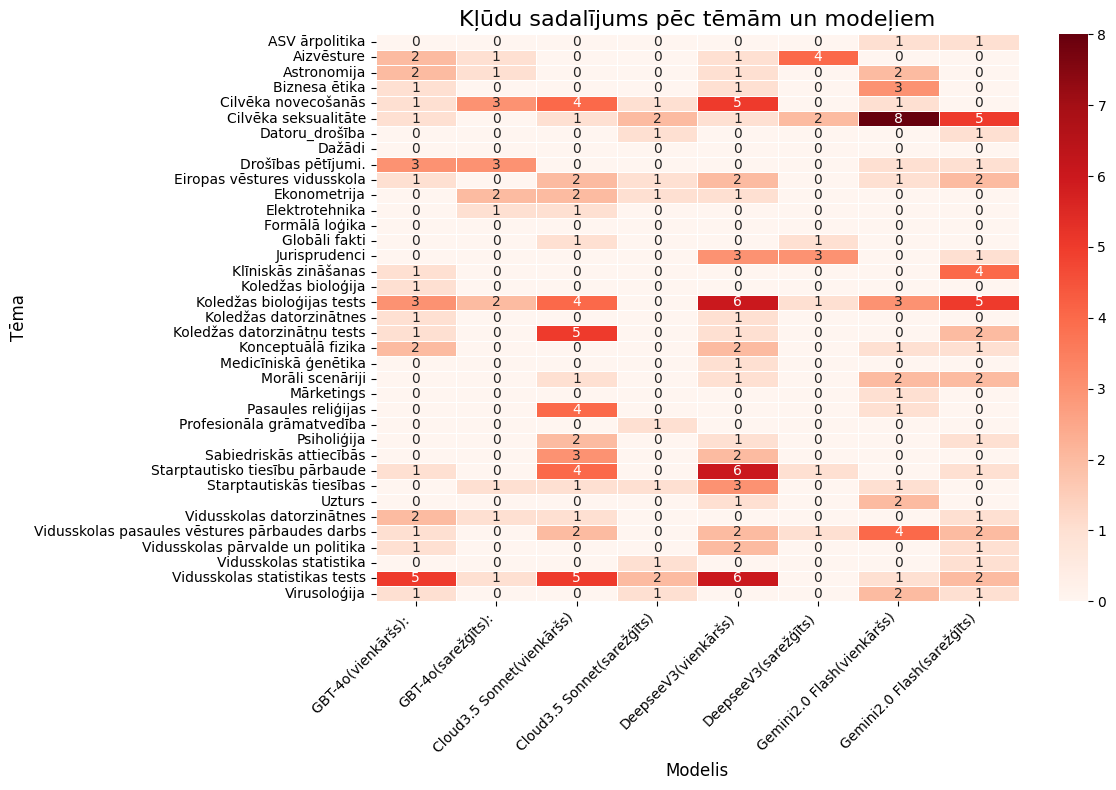

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Augšupielādē Tēmas-un-atbildes.csv failu no datora
uploaded = files.upload()


df = pd.read_csv(next(iter(uploaded)), sep=";")

model_cols = df.columns[:-1]
df_models_raw = df[model_cols]


df_models = df_models_raw.applymap(
    lambda x: 1 if str(x).strip().upper() == "FALSE" else 0
)


df_models["Tēma"] = df["Tēma"]


error_by_theme = df_models.groupby("Tēma").sum()

plt.figure(figsize=(12, 8))
sns.heatmap(error_by_theme, annot=True, fmt="d", cmap="Reds", linewidths=0.5)
plt.title("Kļūdu sadalījums pēc tēmām un modeļiem", fontsize=16)
plt.xlabel("Modelis", fontsize=12)
plt.ylabel("Tēma", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

